# Compute performance metrics for the given Y and Y_score without sklearn

In [17]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

### A. 1. Confusion Matrix

In [18]:
#A.
#1. Confusion Matrix

data1 = pd.read_csv("5_a.csv")
data = pd.read_csv("5_a.csv")

#Classsifing the data
data.loc[data['proba'] < 0.5,'proba'] = 0
data.loc[data['proba'] >= 0.5,'proba'] = 1


y = list(data['y'])
proba = list(data['proba'])

#confusion Matrix as a funciton
def confusion_matrix(y,proba):
    true_neg, false_neg, false_pos, true_pos = 0,0,0,0

    for i in range(len(y)):
        if y[i] == 0 and proba[i] == 0:
            true_neg += 1

        elif y[i] == 0 and proba[i] == 1:
            false_pos += 1
        elif y[i] == 1 and proba[i] == 0:
            false_neg += 1
        elif y[i] == 1 and proba[i] == 1:
            true_pos += 1
    
    return (true_neg,false_neg,false_pos,true_pos) 

true_neg,false_neg,false_pos,true_pos = confusion_matrix(y,proba)
print("TN"," ","FN"," ","FP"," ","TP")
print(true_neg,"  ",false_neg," ",false_pos," ",true_pos)

TN   FN   FP   TP
0    0   100   10000


### A. 2. F1 score

In [19]:
#f1 score

precision = (true_pos/(true_pos+false_pos))

print("Precision: ",precision)

recall = (true_pos/(true_pos+false_neg)) 
print("Recall: ",recall)

f1_score = (2*precision*recall)/(precision+recall)
print("F1 Score: ",f1_score)

Precision:  0.9900990099009901
Recall:  1.0
F1 Score:  0.9950248756218906


### A. 4. Accuracy Score

In [21]:
#Accuracy Score

accuracy_score = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
print("Accuracy Score: ",accuracy_score)


Accuracy Score:  0.9900990099009901


### A. 3. AUC Score

In [22]:
#AUC score
from tqdm import tqdm

unique = data1.proba.unique()
unique = sorted(unique,reverse= True)

#Sorting the data
data1 = data1.sort_values(by='proba',ascending=False)

#Creating a copy of the data
temp = data1.copy()

#tpr and fpr array
true_positive_rates = []
false_positive_rates = []

#Calculatig tpr and fpr for each threshold value
for i in tqdm(unique):
    data1.loc[data1['proba'] >= i,'proba'] = 1
    data1.loc[data1['proba'] < i,'proba'] = 0

    y = list(data1['y'])
    proba = list(data1['proba'])

    #getting values from confusion matrix
    true_neg,false_neg,false_pos,true_pos = confusion_matrix(y,proba)
    
    #calclating tpr and fpr for signle thershold value
    tpr = (true_pos/(true_pos+false_neg))
    fpr = (false_pos/(true_neg+false_pos))
    
    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)
    
    #restoring the original data
    data1 = temp.copy()    
    
#Calculating the area under curve
auc_score = np.trapz(true_positive_rates,false_positive_rates) 
print(auc_score)
    


100%|██████████| 10100/10100 [03:35<00:00, 63.20it/s]


0.48829900000000004


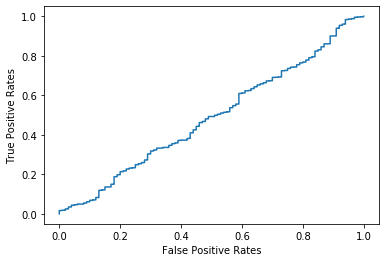

In [23]:
import matplotlib.pyplot as plt
plt.plot(false_positive_rates, true_positive_rates)
plt.ylabel('True Positive Rates')
plt.xlabel('False Positive Rates')
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

### B. 1. Confusion Matrix

In [24]:
# write your code
#B.
#1. Confusion Matrix

data1 = pd.read_csv("5_b.csv")
data = pd.read_csv("5_b.csv")

#Classifing data
data.loc[data['proba'] < 0.5,'proba'] = 0
data.loc[data['proba'] >= 0.5,'proba'] = 1


y = list(data['y'])
proba = list(data['proba'])

#Confusion Matrix
def confusion_matrix(y,proba):
    true_neg, false_neg, false_pos, true_pos = 0,0,0,0

    for i in range(len(y)):
        if y[i] == 0 and proba[i] == 0:
            true_neg += 1

        elif y[i] == 0 and proba[i] == 1:
            false_pos += 1

        elif y[i] == 1 and proba[i] == 0:
            false_neg += 1
        
        elif y[i] == 1 and proba[i] == 1:
            true_pos += 1
    
    return (true_neg,false_neg,false_pos,true_pos) 


true_neg,false_neg,false_pos,true_pos = confusion_matrix(y,proba)

print("TN","  ","FN"," ","FP"," ","TP")
print(true_neg,"",false_neg,"",false_pos," ",true_pos)


TN    FN   FP   TP
9761  45  239   55


### B. 2. F1 score

In [25]:
#f1 score

precision = (true_pos/(true_pos+false_pos))
print("Precison: ",precision)

recall = (true_pos/(true_pos+false_neg)) 
print("Recall: ",recall)

f1_score = (2*precision*recall)/(precision+recall)
print("F1 Score: ",f1_score)

Precison:  0.1870748299319728
Recall:  0.55
F1 Score:  0.2791878172588833


### B. 4. Accurcy Score

In [26]:
#Accuracy Score

accuracy_score = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
print("Accuracy Score: ",accuracy_score)


Accuracy Score:  0.9718811881188119


### B. 3. AUC Score

In [27]:
#lisitng unique values
unique = data1.proba.unique()
unique = sorted(unique,reverse= True)

#Sorting data
data1 = data1.sort_values(by='proba',ascending=False)

#Creating deep copy of data
temp = data1.copy()

#tpr and fpr arrays
true_positive_rates = []
false_positive_rates = []

for i in tqdm(unique):
    
    #Classifing based on threshold
    data1.loc[data1['proba'] >= i,'proba'] = 1
    data1.loc[data1['proba'] < i,'proba'] = 0
    
    y = list(data1['y'])
    proba = list(data1['proba'])

    #COnfusion matrix
    true_neg,false_neg,false_pos,true_pos = confusion_matrix(y,proba)
    
    tpr = (true_pos/(true_pos+false_neg))
    fpr = (false_pos/(true_neg+false_pos))
    
    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)
        
    data1 = temp.copy()    
    
auc_score = np.trapz(true_positive_rates,false_positive_rates)
print(auc_score)    
    


100%|██████████| 10100/10100 [02:28<00:00, 67.90it/s]


0.9377570000000001


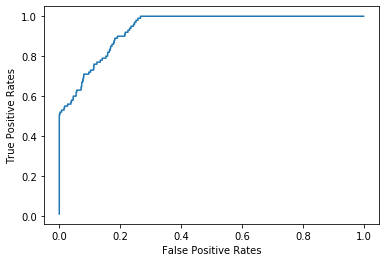

In [28]:
import matplotlib.pyplot as plt
plt.plot(false_positive_rates, true_positive_rates)
plt.ylabel('True Positive Rates')
plt.xlabel('False Positive Rates')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

## C.

In [12]:
import sys 
INT_MAX = sys.maxsize 

#holds the threshold of minimum metric value
minimum = INT_MAX

#holds the minimum metric value
threshold = -1

data2 = pd.read_csv("5_c.csv")

unique = data2.prob.unique()
unique = sorted(unique)

data2 = data2.sort_values(by='prob',ascending=False)
temp = data2.copy()

#Calculating false neg and false pos
for i in unique:
    data2.loc[data2['prob'] >= i,'prob'] = 1
    data2.loc[data2['prob'] < i,'prob'] = 0
    y = list(data2['y'])
    prob = list(data2['prob'])

    true_neg,false_neg,false_pos,true_pos = confusion_matrix(y,prob)

    A = 500*false_neg+100*false_pos
    
    if A < minimum:
        minimum = A
        threshold = i
    
    data2 = temp.copy()    
    

print("Threshold Value:",threshold,"\n","Metric Value: ",minimum)
    
    

Threshold Value: 0.2300390278970873 
 Metric Value:  141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

### D. 1. Mean Squared Error

In [13]:
data3 = pd.read_csv('5_d.csv')

y = list(data3['y'])
pred = list(data3['pred'])

mean_square_error = np.square(np.subtract(y,pred)).mean() 
print(mean_square_error) 


177.16569974554707


### D. 2. MAPE

In [14]:
error = np.absolute(np.subtract(y,pred))

MAPE = (sum(error)/sum(y))*100
print("MAPE", MAPE)


MAPE 12.91202994009687


### D. 3. R Square

In [15]:
ss_total = np.sum(np.square(y-np.mean(y)))

ss_res = np.sum(np.square(np.subtract(y,pred)))

r_square = 1 - (ss_res/ss_total)
print("R Square:",r_square)

R Square: 0.9563582786990937
